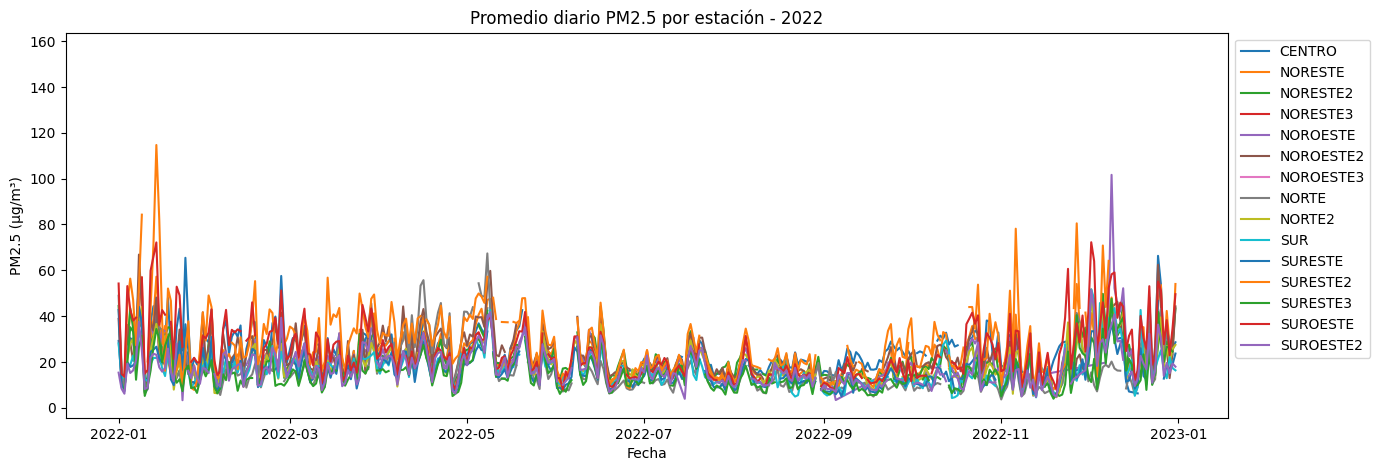

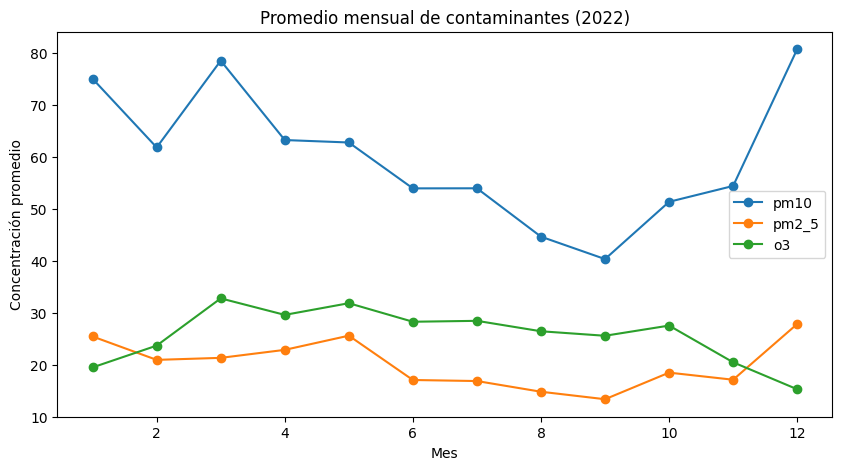

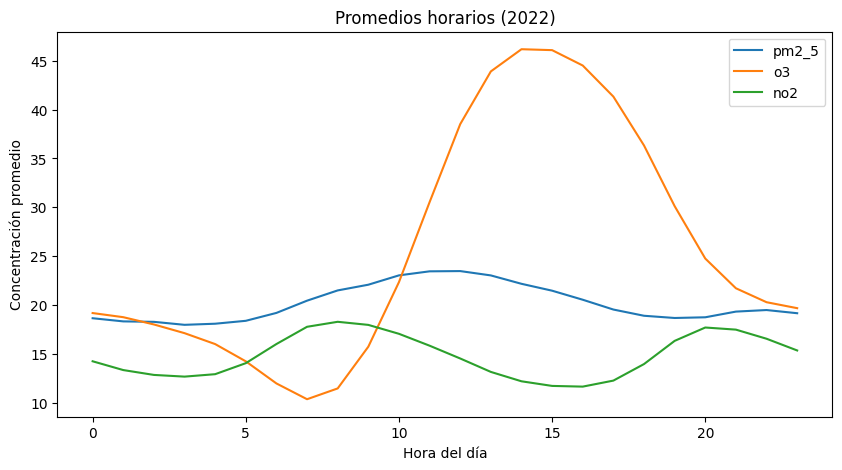

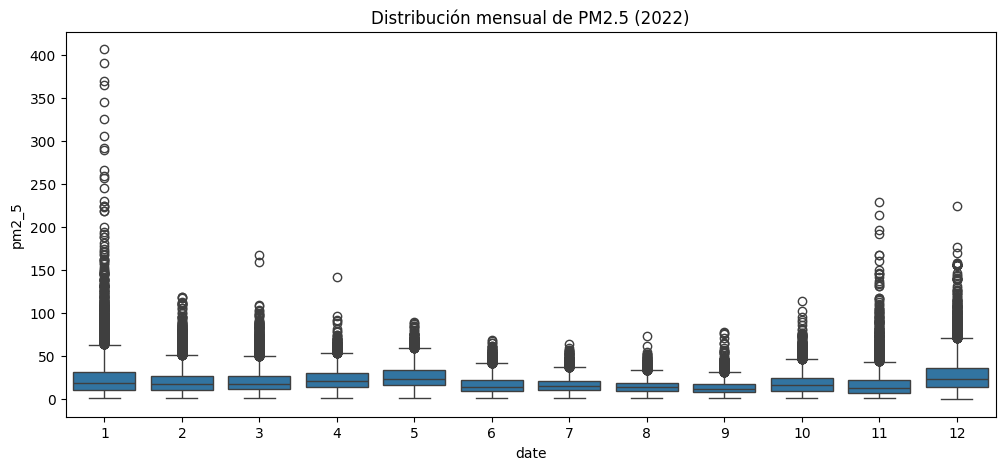

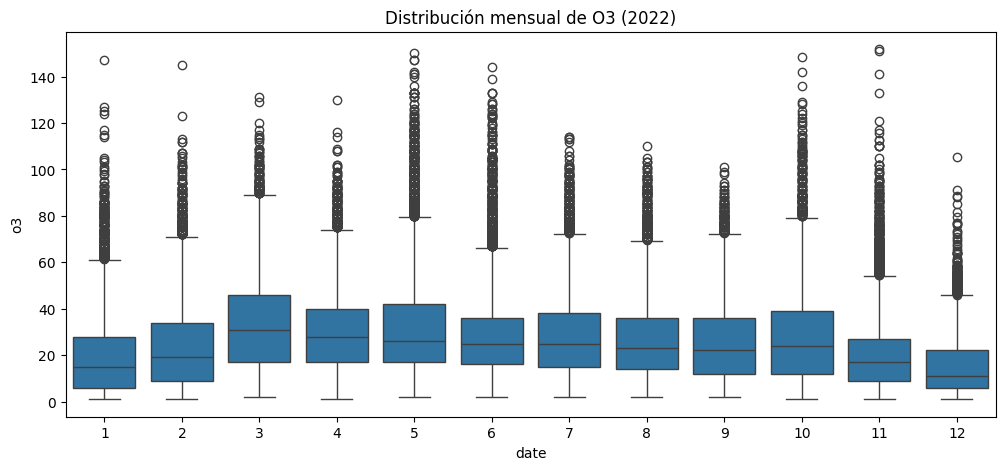

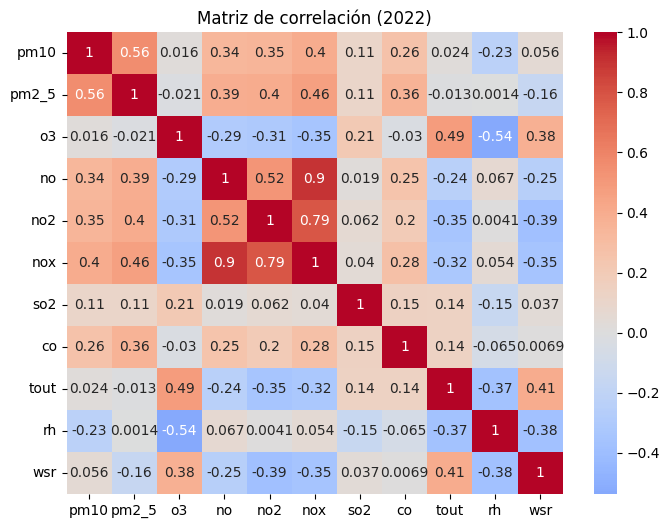

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Cargar el archivo limpio
df = pd.read_csv("sima_2022_final_sin_outliers_v2.csv", parse_dates=["date"])

# --- Ejemplo de chequeos rápidos ---

# 2) Promedio diario PM2.5 por estación
df_d = df.groupby(["estacion", df["date"].dt.date])["pm2_5"].mean().reset_index()
plt.figure(figsize=(15,5))
for est in df_d["estacion"].unique():
    plt.plot(df_d[df_d["estacion"]==est]["date"],
             df_d[df_d["estacion"]==est]["pm2_5"], label=est)
plt.title("Promedio diario PM2.5 por estación - 2022")
plt.xlabel("Fecha")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# 3) Promedios mensuales
df_m = df.groupby(df["date"].dt.month)[["pm10","pm2_5","o3"]].mean()
df_m.plot(marker="o", figsize=(10,5))
plt.title("Promedio mensual de contaminantes (2022)")
plt.xlabel("Mes")
plt.ylabel("Concentración promedio")
plt.show()

# 4) Promedios horarios
df_h = df.groupby(df["date"].dt.hour)[["pm2_5","o3","no2"]].mean()
df_h.plot(figsize=(10,5))
plt.title("Promedios horarios (2022)")
plt.xlabel("Hora del día")
plt.ylabel("Concentración promedio")
plt.show()

# 5) Boxplots mensuales para PM2.5 y O3
plt.figure(figsize=(12,5))
sns.boxplot(x=df["date"].dt.month, y=df["pm2_5"])
plt.title("Distribución mensual de PM2.5 (2022)")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x=df["date"].dt.month, y=df["o3"])
plt.title("Distribución mensual de O3 (2022)")
plt.show()

# 6) Matriz de correlación
corr = df[["pm10","pm2_5","o3","no","no2","nox","so2","co","tout","rh","wsr"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación (2022)")
plt.show()
